In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('csvs/delhi_air.csv')

df

,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
0,1,1,2021,0,5,408.80,442.42,160.61,12.95,2.77,43.19,462
1,2,1,2021,0,6,404.04,561.95,52.85,5.18,2.60,16.43,482
2,3,1,2021,1,7,225.07,239.04,170.95,10.93,1.40,44.29,263
3,4,1,2021,0,1,89.55,132.08,153.98,10.42,1.01,49.19,207
4,5,1,2021,0,2,54.06,55.54,122.66,9.70,0.64,48.88,149
...,...,...,...,...,...,...,...,...,...,...,...,...
1456,27,12,2024,0,5,58.43,249.17,41.69,65.89,0.99,36.25,263
1457,28,12,2024,0,6,33.83,150.77,33.31,66.14,0.79,35.19,113
1458,29,12,2024,1,7,31.21,139.75,27.01,65.94,0.57,35.88,142
1459,30,12,2024,0,1,38.01,152.83,29.12,65.16,0.55,38.38,116


In [4]:
df.shape

(1461, 12)

In [6]:
df.isnull().sum()

Date              0
Month             0
Year              0
Holidays_Count    0
Days              0
PM2.5             0
PM10              0
NO2               0
SO2               0
CO                0
Ozone             0
AQI               0
dtype: int64

In [12]:
print(df.columns)
print(df.index)
df.describe()

Index(['Date', 'Month', 'Year', 'Holidays_Count', 'Days', 'PM2.5', 'PM10',
       'NO2', 'SO2', 'CO', 'Ozone', 'AQI'],
      dtype='object')
RangeIndex(start=0, stop=1461, step=1)


,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
count,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,15.729637,6.522930,2022.501027,0.189596,4.000684,90.774538,218.219261,37.184921,20.104921,1.025832,36.338871,202.210815
std,8.803105,3.449884,1.118723,0.392116,2.001883,71.650579,129.297734,35.225327,16.543659,0.608305,18.951204,107.801076
min,1.000000,1.000000,2021.000000,0.000000,1.000000,0.050000,9.690000,2.160000,1.210000,0.270000,2.700000,19.000000
25%,8.000000,4.000000,2022.000000,0.000000,2.000000,41.280000,115.110000,17.280000,7.710000,0.610000,24.100000,108.000000
50%,16.000000,7.000000,2023.000000,0.000000,4.000000,72.060000,199.800000,30.490000,15.430000,0.850000,32.470000,189.000000
75%,23.000000,10.000000,2024.000000,0.000000,6.000000,118.500000,297.750000,45.010000,26.620000,1.240000,45.730000,284.000000
max,31.000000,12.000000,2024.000000,1.000000,7.000000,1000.000000,1000.000000,433.980000,113.400000,4.700000,115.870000,500.000000


Correlation Matrix:

Generating heatmap...


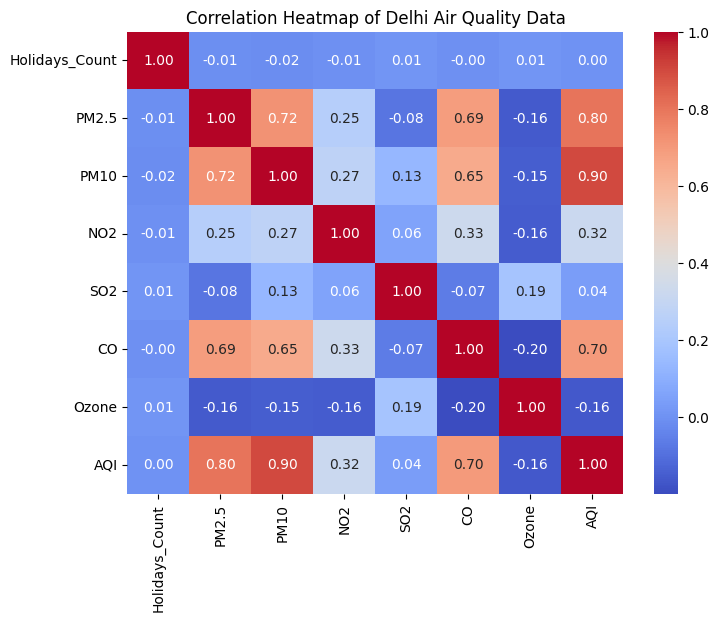

In [37]:
numerical_df = df[['Holidays_Count', 'PM2.5', 'PM10','NO2', 'SO2', 'CO', 'Ozone', 'AQI']]

correlation_matrix = numerical_df.corr()

print("Correlation Matrix:")
print("\nGenerating heatmap...")
plt.figure(figsize=(8, 6))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Heatmap of Delhi Air Quality Data')
plt.show()

In [ ]:
df_cleaned = df   # dropped year,date and day columns as they are not needed for analysis(deleted line by mistake)
df_cleaned

,Month,Holidays_Count,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
0,1,0,408.80,442.42,160.61,12.95,2.77,43.19,462
1,1,0,404.04,561.95,52.85,5.18,2.60,16.43,482
2,1,1,225.07,239.04,170.95,10.93,1.40,44.29,263
3,1,0,89.55,132.08,153.98,10.42,1.01,49.19,207
4,1,0,54.06,55.54,122.66,9.70,0.64,48.88,149
...,...,...,...,...,...,...,...,...,...
1456,12,0,58.43,249.17,41.69,65.89,0.99,36.25,263
1457,12,0,33.83,150.77,33.31,66.14,0.79,35.19,113
1458,12,1,31.21,139.75,27.01,65.94,0.57,35.88,142
1459,12,0,38.01,152.83,29.12,65.16,0.55,38.38,116


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

X = df_cleaned.drop('AQI', axis=1)
Y = df_cleaned['AQI']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=101)

lm = LinearRegression()
lm.fit(X_train, y_train)

predictions = lm.predict(X_test)

mae = metrics.mean_absolute_error(y_test, predictions)
mse = metrics.mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, predictions)        #final accuracy metric to check how well the model is performing

print('Linear Regression Model Evaluation:')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared: {r2}')

coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
print('\nCoefficients:')
print(coeff_df)

Linear Regression Model Evaluation:
Mean Absolute Error (MAE): 27.03804996027562
Mean Squared Error (MSE): 1250.203756035702
Root Mean Squared Error (RMSE): 35.35822048740154
R-squared: 0.8925789587421199

Coefficients:
                Coefficient
Month             -1.946207
Holidays_Count     3.713925
PM2.5              0.324978
PM10               0.545687
NO2                0.225610
SO2               -0.118676
CO                16.704567
Ozone             -0.006440


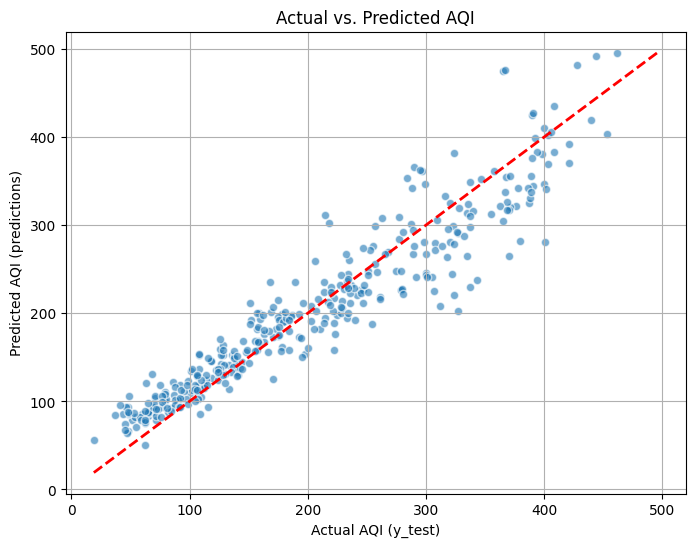

In [31]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.6, edgecolors='w')

plt.xlabel('Actual AQI (y_test)')
plt.ylabel('Predicted AQI (predictions)')
plt.title('Actual vs. Predicted AQI')

min_val = min(y_test.min(), predictions.min())
max_val = max(y_test.max(), predictions.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2) 

plt.grid(True)
plt.show()

In [39]:
random_data_to_test = {
    'Month': [7],
    'Holidays_Count': [1],
    'PM2.5': [290],
    'PM10': [450.6],
    'NO2': [85.21],
    'SO2': [30],
    'CO': [3.1],
    'Ozone': [34.5]
}
new_df = pd.DataFrame(random_data_to_test, columns=X.columns)

predicted_aqi = lm.predict(new_df)

print("\n--- Prediction for New Scenario ---")
print(f"Input Data:\n{new_df.to_string(index=False)}\n")
print(f"Predicted AQI: {predicted_aqi[0]:.2f}")


--- Prediction for New Scenario ---
Input Data:
 Month  Holidays_Count  PM2.5  PM10   NO2  SO2  CO  Ozone
     7               1    290 450.6 85.21   30 3.1   34.5

Predicted AQI: 440.36


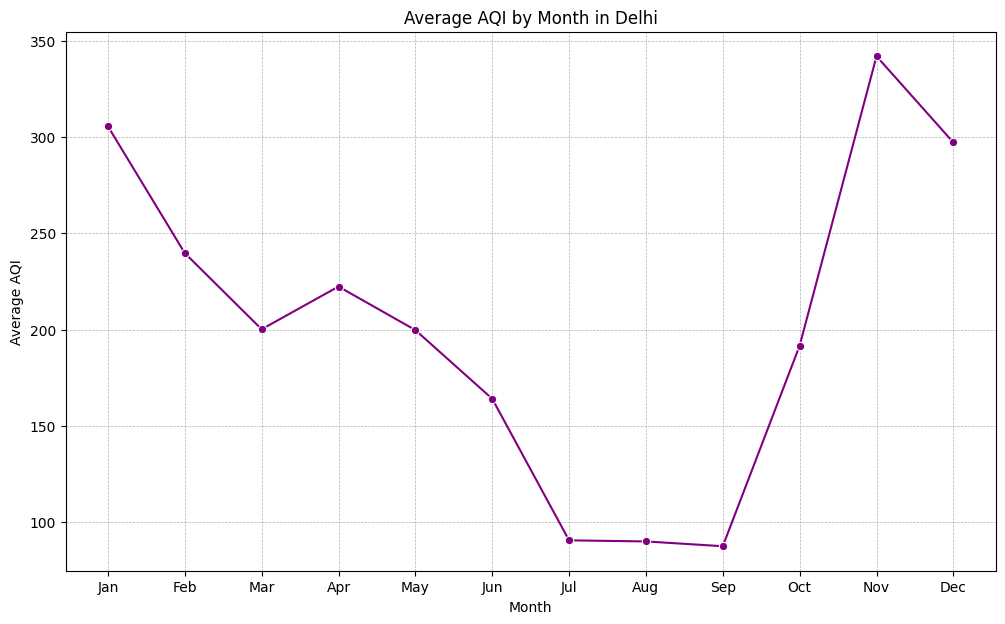

In [35]:
monthly_aqi = df.groupby('Month')['AQI'].mean().reset_index()

plt.figure(figsize=(12, 7))
sns.lineplot(data=monthly_aqi, x='Month', y='AQI', marker='o', color='purple')

plt.title('Average AQI by Month in Delhi')
plt.xlabel('Month')
plt.ylabel('Average AQI')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, which='both', linestyle='--', linewidth=0.5)